In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [5]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2608 - accuracy: 0.9225
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1044 - accuracy: 0.9674
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0699 - accuracy: 0.9779
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0507 - accuracy: 0.9844
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0401 - accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0306 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0255 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0202 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0176 - accuracy: 0.9938
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.015

In [7]:
model.save('digits.model')

INFO:tensorflow:Assets written to: digits.model\assets


The result is: 3


<function matplotlib.pyplot.show(close=None, block=None)>

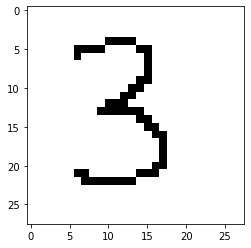

In [8]:
img = cv.imread(f'C:/Machine learning/3.png')[:,:,0]
img = np.invert(np.array([img]))
prediction = model.predict(img)
print (f'The result is: {np.argmax(prediction)}')
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show